In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 1st Question

In [2]:
N = 1000
p = 0.5
theta = 2.0*np.pi*np.random.rand(N)
r = np.power(np.abs(np.cos(theta))**p +np.abs(np.sin(theta))**p, -1/p)
sample = np.pi*(r**2)
print('Area:', np.mean(sample))
print('Variance:', np.var(sample)/N)

Area: 0.67678072054
Variance: 0.000168378942586


### 2nd Question

In [3]:
# Part A
A = np.array([[1/4, 1/4, 1/4, 0, 0, 1/4],
             [0, 1/4, 1/4, 0, 1/4, 1/4],
             [0, 1/4, 0, 1/2, 0, 1/4],
             [0, 1/4, 1/2, 0, 0, 1/4],
             [0, 1/4, 1/4, 0, 1/4, 1/4],
             [1/4, 1/4, 1/4, 0, 0, 1/4]])

A = np.transpose(A) # A(i,j) is the probability of transition j -> i
A

array([[ 0.25,  0.  ,  0.  ,  0.  ,  0.  ,  0.25],
       [ 0.25,  0.25,  0.25,  0.25,  0.25,  0.25],
       [ 0.25,  0.25,  0.  ,  0.5 ,  0.25,  0.25],
       [ 0.  ,  0.  ,  0.5 ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.25,  0.  ,  0.  ,  0.25,  0.  ],
       [ 0.25,  0.25,  0.25,  0.25,  0.25,  0.25]])

In [4]:
# Part B
e_val, e_vec  = np.linalg.eig(A)
i = np.isclose(e_val, 1.0)
i = np.argmax(i)
v = e_vec[:,i]
vn = np.abs(v/np.sum(v)) # Normalize and make probabilities positive
print(vn)

[ 0.08333333  0.25        0.22222222  0.11111111  0.08333333  0.25      ]


It is not a uniform distribution.

In [5]:
# Part C
x = np.dot(A, np.diag(vn))
np.isclose(x, np.transpose(x)).all()

False

It is not in detailed balance.

In [6]:
# Part D
eps = 1e-8
p = [1, 0, 0, 0, 0, 0]
p2 = np.dot(A,p)
mix_time = 1

while (np.logical_not(np.allclose(p2, p, rtol = eps))):
    p,p2 = p2,np.dot(A,p2)
    mix_time += 1
        
print(p)
print(p2)
print('Mixing time is %d.' %mix_time)

[ 0.08333333  0.25        0.22222222  0.11111112  0.08333333  0.25      ]
[ 0.08333333  0.25        0.22222223  0.11111111  0.08333333  0.25      ]
Mixing time is 25.


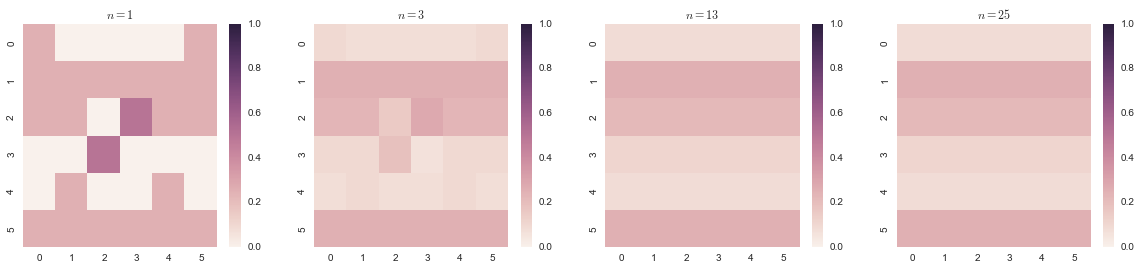

In [7]:
# Part E
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))
for j, n in enumerate([1, 3, 13, 25]):
    sns.heatmap(np.linalg.matrix_power(A, n), vmin = 0, vmax = 1, ax = ax[j])
    ax[j].set_title("$n = %d$" % n)
plt.show()

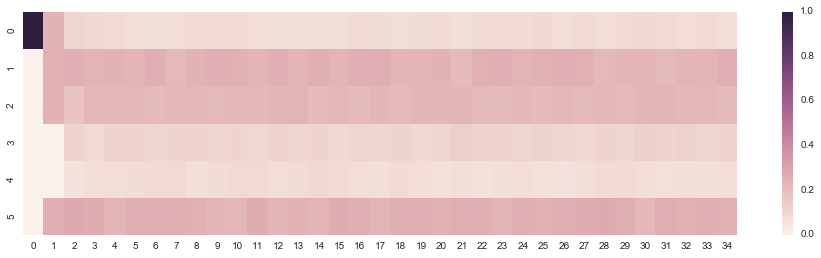

In [8]:
# Part F
def simulate(P, N):
    chain = np.zeros(N).astype(int)
    chain[0] = 0
    for i in range(1,N):
        pr = A[:, chain[i-1]]
        chain[i] = np.random.choice(range(6), p = pr)

    return(chain)

nchains = 1000
chain_length = mix_time + 10
samples = np.zeros([nchains, chain_length]).astype(int)
for i in range(0, nchains):
    ch = simulate(A, chain_length)
    samples[i,:] = ch

column_histograms = np.apply_along_axis(lambda x: np.histogram(x, bins=[0,1,2,3,4,5,6], density = True)[0], 0, samples)

plt.figure(figsize=(16, 4))
sns.heatmap(column_histograms)
plt.show()

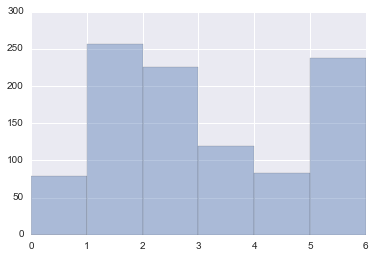

In [11]:
# Part G
def simulate(P, N):
    chain = np.zeros(N).astype(int)
    chain[0] = 0
    for i in range(1,N):
        pr = P[:, chain[i-1]]
        chain[i] = np.random.choice(range(6), p = pr)
    return chain

nchains = 1000 + mix_time
chain = simulate(A, nchains)
sns.distplot(chain[mix_time:], kde = False, bins=[0,1,2,3,4,5,6])
plt.show()

In [12]:
print('Eigenvector is:', vn)
print('Distribution of states:',np.histogram(chain[mix_time:], bins = [0,1,2,3,4,5,6])[0]/1000 )

Eigenvector is: [ 0.08333333  0.25        0.22222222  0.11111111  0.08333333  0.25      ]
Distribution of states: [ 0.079  0.257  0.225  0.119  0.083  0.237]


They are in agreement. They would be closer to each other if we had used more samples.